<a href="https://colab.research.google.com/github/kmk3593/google_drive/blob/main/hg_chapter9/chapter_9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 신경망 훈련하기
- RNN은 실무에서 안씀!!!!!!!!!!!
- 나온 배경
  + 문장이 길면, 학습 능력이 떨어짐
  + Long Short-Term Memory
- 단기 기억을 오래 기억하기 위해 고안됨. 



### 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


### padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

### 모형 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8)) # SimpleRNN
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# epochs = 100
history = model.fit(train_seq, train_target, epochs=10, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
313/313 [==============================] - 13s 36ms/step - loss: 0.6922 - accuracy: 0.5400 - val_loss: 0.6909 - val_accuracy: 0.5952
Epoch 2/10
313/313 [==============================] - 12s 39ms/step - loss: 0.6886 - accuracy: 0.6219 - val_loss: 0.6855 - val_accuracy: 0.6436
Epoch 3/10
313/313 [==============================] - 10s 33ms/step - loss: 0.6778 - accuracy: 0.6671 - val_loss: 0.6655 - val_accuracy: 0.6896
Epoch 4/10
313/313 [==============================] - 11s 35ms/step - loss: 0.6173 - accuracy: 0.7113 - val_loss: 0.5780 - val_accuracy: 0.7118
Epoch 5/10
313/313 [==============================] - 11s 34ms/step - loss: 0.5591 - accuracy: 0.7294 - val_loss: 0.5511 - val_accuracy: 0.7362
Epoch 6/10
313/313 [==============================] - 13s 43ms/step - loss: 0.5346 - accuracy: 0.7499 - val_loss: 0.5300 - val_accuracy: 0.7488
Epoch 7/10
313/313 [==============================] - 10s 33ms/step - loss: 0.5143 - accuracy: 0.7640 - val_loss: 0.5139 - val_accuracy:

### 손실 곡선 추가

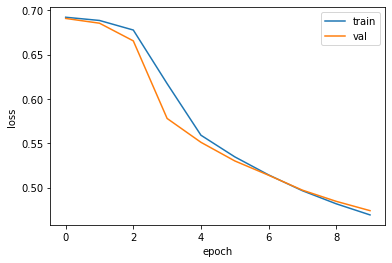

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환층에 드롭아웃 적용하기

Epoch 1/10
313/313 [==============================] - 14s 37ms/step - loss: 0.6929 - accuracy: 0.5109 - val_loss: 0.6926 - val_accuracy: 0.5336
Epoch 2/10
313/313 [==============================] - 11s 34ms/step - loss: 0.6915 - accuracy: 0.5725 - val_loss: 0.6908 - val_accuracy: 0.5904
Epoch 3/10
313/313 [==============================] - 11s 34ms/step - loss: 0.6887 - accuracy: 0.6108 - val_loss: 0.6868 - val_accuracy: 0.6312
Epoch 4/10
313/313 [==============================] - 13s 40ms/step - loss: 0.6818 - accuracy: 0.6508 - val_loss: 0.6774 - val_accuracy: 0.6510
Epoch 5/10
313/313 [==============================] - 11s 35ms/step - loss: 0.6623 - accuracy: 0.6740 - val_loss: 0.6441 - val_accuracy: 0.6678
Epoch 6/10
313/313 [==============================] - 11s 35ms/step - loss: 0.6024 - accuracy: 0.7145 - val_loss: 0.5710 - val_accuracy: 0.7374
Epoch 7/10
313/313 [==============================] - 12s 38ms/step - loss: 0.5601 - accuracy: 0.7370 - val_loss: 0.5479 - val_accuracy:

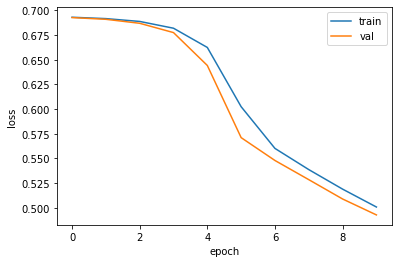

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
# 드롭아웃 추가
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# epcohs = 100
history = model2.fit(train_seq, train_target, epochs=10, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- Reference : 혼자 공부하는 머신러닝 + 딥러닝